# MRI Images

This notebook provides brief instruction describing how to read MRI images with Python and exercise materials.

## Setup

In [1]:
!pip install numpy matplotlib
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir data

In [3]:
!curl https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/27995283/sub01_sesanatomy_T1w.nii.gz -o data/sub-01_ses-anatomy_T1w.nii.gz
!curl https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/27995286/sub01_sesperceptionNaturalImageTest01_taskperception_run01_bold.nii.gz -o data/sub-01_ses-perceptionNaturalImageTest01_task-perception_run-01_bold.nii.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.0M  100 10.0M    0     0  6214k      0  0:00:01  0:00:01 --:--:-- 6214k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  184M  100  184M    0     0  22.5M      0  0:00:08  0:00:08 --:--:-- 27.1M


In [4]:
!ls data

sub-01_ses-anatomy_T1w.nii.gz
sub-01_ses-perceptionNaturalImageTest01_task-perception_run-01_bold.nii.gz


## Introduction

In neuroscience community, MRI images are often saved, processed, and shared in **NIfTI-1** format.
The file extension is `.nii` (uncompressed) or `.nii.gz` (gzipped).
A single NIfTI-1 file can contains either 3-D (spatial) or 4-D (spatial + temporal) MRI image.

More information:

- <https://nifti.nimh.nih.gov/nifti-1/>

## Visualization of NIfTI images

- Use **nibabel** to handle NIfTI images.
  - <https://nipy.org/nibabel/>
- `nibabel.load` load an NIfTI image as a nibabel image instance.
- To obtain the image as a Numpy array, run `np.asanyarray(<img>.dataobje)`.

In [5]:
import os

import nibabel
import numpy as np
import matplotlib.pyplot as plt

### Anatomical MRI image (3-D NIfTI image)

First, we are going to see an anatomical MRI image.

In [6]:
# Load an anatomical MRI image (3-D NIfTI image)
img_t1 = nibabel.load('data/sub-01_ses-anatomy_T1w.nii.gz')

# Extract the image as an array
data_t1 = np.asanyarray(img_t1.dataobj)
data_t1.shape

(256, 256, 208)

The loaded image should have shape of (256, 256, 208).

You can check the spatial direction of each dimension of the image array by the following code.

In [7]:
nibabel.aff2axcodes(img_t1.affine)

('P', 'I', 'L')

N-th letter represnets the incremental direction of N-th dimention of the image array.

- **A**/**P**: Anterior/Posterior
- **S**/**I**: Superior/Inferior
- **L**/**R**: Left/Right

See also: [Anatomical terms of location - Wikipedia](https://en.wikipedia.org/wiki/Anatomical_terms_of_location)

Thus, the dimension-direction correspondense of the loaded image is:

- 1st dim: anterior to posterior
- 2nd dim: superior to inferior
- 3rd dim: right to left

**Terminology on brain anatomy**

- Anterir vs posterior
- Superior vs inferior
- Dorsal vs ventral

<img src="http://2.bp.blogspot.com/-XPtNSJi3aPY/VAlNvjPL_4I/AAAAAAAAEII/8H0ltumAE8U/s1600/brain%2Btilt%2Bhead.png" width=800px>

Image from "Neuroscience, 4th ed." Sinauer, 2007

You can check the size of each voxel (each element of an MRI image) by the following code (unit: mm).

In [8]:
img_t1.header.get_zooms()

(1.0, 1.0, 1.0)

Now, let's visualize a sagital slice of the loaded MRI image by display the slice at the center of the left/right axis.

**Sagittal, coronal, and axial slices**

<img src="https://users.fmrib.ox.ac.uk/~stuart/thesis/chapter_3/image3_5.gif" width=800px>

Image from https://users.fmrib.ox.ac.uk/~stuart/thesis/chapter_3/section3_2.html

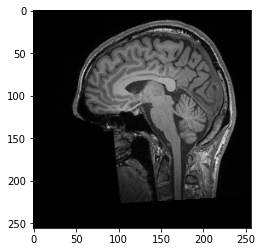

In [9]:
# Visualize the middle sagittal plane
plt.imshow(data_t1[:, :, data_t1.shape[2] // 2].T, cmap='gray')

---
**Exercise 1**

Visualize axial and coronal planes of the loaded image.

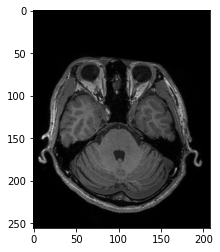

In [14]:
# Axial slice
plt.imshow(data_t1[:,data_t1.shape[1]//2,:], cmap='gray')

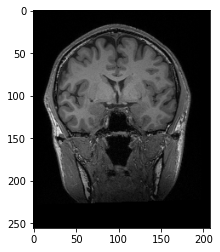

In [15]:
# Coronal slice
plt.imshow(data_t1[data_t1.shape[0]//2,:,:], cmap='gray')

---

### Functional MRI image (4-D NIfTI image)

Next, let's take a look at a 4-D MRI image.

In [16]:
# Load functional MRI images (4-D NIfTI image)
img_fmri = nibabel.load('data/sub-01_ses-perceptionNaturalImageTest01_task-perception_run-01_bold.nii.gz')

# Extract the image as an array
data_fmri = np.asanyarray(img_fmri.dataobj)
data_fmri.shape

(96, 96, 76, 239)

You can see that the loaded image is 4-dimensional.
The first three dimensions are spatial and the 4th is temporal.
So, the image contains whole brain fMRI data from 239 timepoints.
The fMRI image at each timepoint is called *volume*.

Let's check the dimension-direction correspondense and voxel size.

In [17]:
nibabel.aff2axcodes(img_fmri.affine)

('L', 'P', 'S')

Thus, the dimension-direction correspondense of the loaded image is:

- 1st dim: right to left
- 2nd dim: anterior to posterior
- 3rd dim: inferior to superior

In [18]:
img_fmri.header.get_zooms()

(2.0, 2.0, 2.0, 2.0)

This indicates that the voxel size is $2 \times 2 \times 2$ mm and each volume was collected at each 2 sec (*).

\* Strictly speaking, it takes 2 seconds to collect the data of one volume.

The image size (i.e., the number of voxels) are much less than the anatomical image we investigated above because the spatil resolution of fMRI images are lower then anatomical images (i.e., the voxel size of the fMRI image is much larger than the anatomical image).

Let's visualize a sagital slice of the first volume in the loaded MRI image.

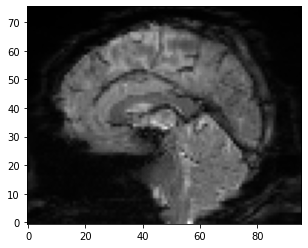

In [19]:
# Sagittal plane
plt.imshow(data_fmri[data_fmri.shape[0] // 2, :, :, 0].T, cmap='gray', origin='lower')

---
**Exercise 2**

Visualize axial and coronal slices of the first volume in the loaded fMRI image.

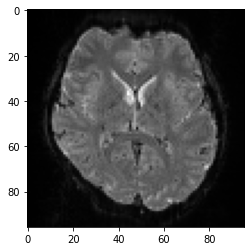

In [21]:
# Axial slice
plt.imshow(data_fmri[ :, :,data_fmri.shape[2] // 2, 0].T, cmap='gray')

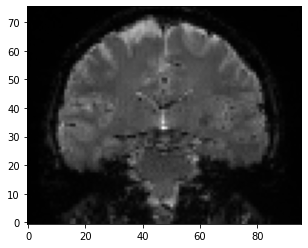

In [22]:
# Coronal slice
plt.imshow(data_fmri[ :, data_fmri.shape[1] // 2,:, 0].T, cmap='gray', origin='lower')

---

In 4D fMRI, each voxel is a time series of BOLD signals.
Let's select one voxel and display its time series.

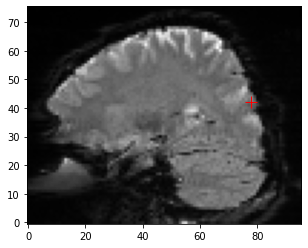

In [23]:
# Time course of a voxel

voxel_index = [33, 78, 42]

plt.imshow(data_fmri[voxel_index[0], :, :, 0].T, cmap='gray', origin='lower')
plt.plot(voxel_index[1], voxel_index[2], 'r+', markersize=12)

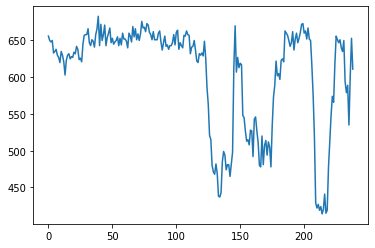

In [24]:
resp = data_fmri[voxel_index[0], voxel_index[1], voxel_index[2], :]
plt.plot(resp)

---
**Exercise 3**

Calculate temporal mean of the fMRI responses of each voxel, and plot the temporal mean as a brain image (in either sagittal, coronal, or axial plane).

(96, 96, 76)


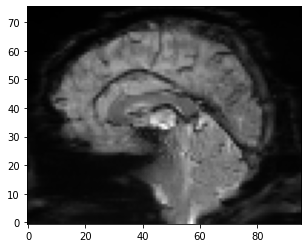

In [26]:
# Complete the code

data_fmri_mean = np.average(data_fmri,axis=3)
print(data_fmri_mean.shape)
plt.imshow(data_fmri_mean[data_fmri_mean.shape[0]//2,:,:].T,cmap="gray",origin="lower")

---